In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
concrete = pd.read_csv("/content/drive/MyDrive/Cases/Concrete Strength/Concrete_Data.csv")
X = concrete.drop('Strength', axis=1)
y = concrete['Strength']
X.shape

(1030, 8)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    random_state=2022)

### Scaling

In [11]:
mm_x = MinMaxScaler()
X_trn_scl = mm_x.fit_transform(X_train)
X_tst_scl = mm_x.transform(X_test)

In [13]:
y_train = y_train.values 
y_test = y_test.values

In [20]:
mm_y = MinMaxScaler()
y_trn_scl = mm_y.fit_transform(y_train.reshape(-1,1))
y_tst_scl = mm_y.transform(y_test.reshape(-1,1))

#### Model Definition

In [24]:
tf.random.set_seed(2022)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu',input_shape=(8,)),
    tf.keras.layers.Dense(4, activation='relu'), 
    tf.keras.layers.Dense(3, activation='relu'), 
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mae'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping( monitor='val_loss',min_delta=0.0001, patience=15,verbose=3,restore_best_weights=True)
history = model.fit(X_trn_scl, y_trn_scl, validation_data=(X_tst_scl, y_tst_scl), epochs=1000,
                    callbacks=[early])

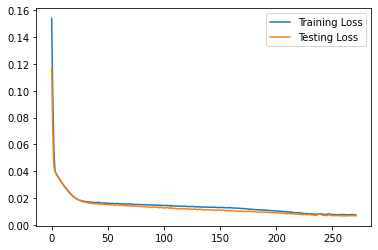

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend(loc='best')
plt.show()

In [28]:
mse, mae = model.evaluate(X_tst_scl, y_tst_scl)
print("Mean Squared Error =", mse)
print("Mean Absolute Error =", mae)

10/10 [==============================] - 0s 2ms/step - loss: 0.0068 - mae: 0.0638
Mean Squared Error = 0.006795407272875309
Mean Absolute Error = 0.06381473690271378


In [37]:
y_pred = model.predict(X_tst_scl)
y_pred[:10]

10/10 [==============================] - 0s 2ms/step


array([[0.1380941 ],
       [0.46697363],
       [0.49697277],
       [0.53670555],
       [0.38575974],
       [0.5736741 ],
       [0.4652461 ],
       [0.5956106 ],
       [0.39723516],
       [0.5230557 ]], dtype=float32)

The predictions are scaled. Hence inverse scaling will be required.

#### Inverse Scaling

In [34]:
y_pred = model.predict(X_tst_scl)
y_pred = mm_y.inverse_transform(y_pred)

10/10 [==============================] - 0s 2ms/step


In [36]:
from sklearn.metrics import r2_score 
print(r2_score(y_test, y_pred))

0.8395894567192548
